# SDSS Activity: Color-Magnitude Diagrams


In [8]:
# This code block defined your token and makes it available as a 
#   system variable for the length of your current session.
# 
# This will usually be the first code block in any script you write.
#
# with open('/home/idies/keystone.token', 'r') as f:
#      token = f.read().rstrip('\n')
# async queries require token to be in --ident system variable
# import sys
# sys.argv.append("--ident="+token)
# print("Your current token is"+token)


import SciServer.LoginPortal as Login
token=Login.getToken()
print('Your SciServer token is: ',token)

Your SciServer token is:  514c0cfa07a4455f89364162b58b3cd7


# 2. Import SciServer libraries 
The SciServer team has written a number of libraries, generally prefixed by <tt>SciServer</tt>, that assist in various functions. As with all Python libraries, they must be actively imported before being used.

The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [10]:
# Step 2a: Import Python libraries to work with SciServer

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work

print('SciServer libraries imported')

SciServer libraries imported


In [11]:
# step 2b import other libraries for use in this notebook.
#
# all of these are included in the default Docker image
# but others can often be downloaded through a terminal or a '!pip install ...' run from 
# within the notebook

import numpy as np                  # standard Python lib for math ops
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import skimage.io                   # image processing library
import urllib                       # accessing resources thorugh remote URLs
import json                         # work with JSON files
print('Supporting libraries imported')

Supporting libraries imported


In [12]:
# Step 2b: Apply some special settings to the imported libraries
#
# ensures columns get written completely in notebook

pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

Settings applied


In [ ]:
# Step 2: Apply some special settings to the imported libraries
# ensures columns get written completely in notebook

pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Step 3: Enter query
query="""
SELECT TOP 200 p.objId,p.ra,p.dec,p.g,p.r,p.i,p.z
  FROM star AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.0
  AND p.g BETWEEN 0 AND 19.0
  
"""
# send query to CasJobs
##queryResponse = CasJobs.executeQuery(query, "dr12",token=token)
queryResponse = CasJobs.executeQuery(query, "dr12")
# store results
stars = pandas.read_csv(queryResponse)
# show results
stars

,objId,ra,dec,g,r,i,z
0,1237645941291614227,49.627485,-1.041769,16.16866,15.59175,15.37656,15.27109
1,1237645942898229350,40.582032,0.134770,16.44310,15.52037,15.17877,14.98173
2,1237645942905569371,57.281615,0.018768,14.92695,14.55624,14.52711,14.19810
3,1237645942905700356,57.512104,0.084887,17.62928,17.09077,16.84065,16.70736
4,1237645942905700448,57.605375,0.027275,15.95246,14.95636,14.59039,14.36437
5,1237645942905831442,57.824999,0.215609,17.32050,17.16499,17.08666,17.03985
6,1237645942905831562,57.943458,0.059678,15.38514,14.69812,14.43655,14.32276
7,1237645942906028070,58.304024,0.013814,17.24245,16.77431,16.59565,16.50845
8,1237645942906028116,58.395736,0.209766,15.35589,14.49014,14.39775,13.79355
9,1237645943434969150,40.279741,0.563509,17.24312,17.35328,17.44520,17.54572


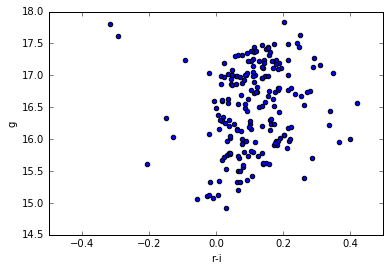

In [20]:
color1 = stars['r']-stars['i']
magnitude = stars['g']

plt.scatter(color1, magnitude)
plt.xlabel('r-i')
plt.ylabel('g')
plt.axis([-0.5, 0.5, 14.5, 18.])
plt.show() 

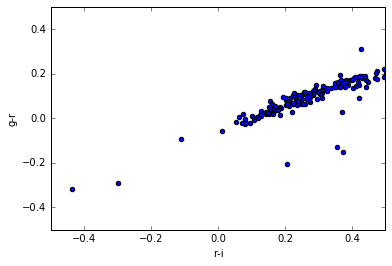

In [21]:
color2 = stars['g']-stars['r']

plt.scatter(color2, color1)
plt.xlabel('r-i')
plt.ylabel('g-r')
plt.axis([-0.5, 0.5, -0.5, 0.5])
plt.show() 

# Let's do it for galaxies

In [25]:
# Step 3: Enter query
query="""
SELECT TOP 200 p.objId,p.ra,p.dec,p.g,p.r,p.i,p.z,s.z
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.r < 17.7
  AND s.z BETWEEN 0.03 AND 0.05
  
"""
# send query to CasJobs
##queryResponse = CasJobs.executeQuery(query, "dr12",token=token)
queryResponse = CasJobs.executeQuery(query, "dr12")
# store results
galaxies = pandas.read_csv(queryResponse)
# show results
galaxies

,objId,ra,dec,g,r,i,z,z.1
0,1237645879551066262,348.902530,1.271886,18.23754,17.58132,17.20153,16.90159,0.032125
1,1237645879578460271,51.483584,1.272013,17.37778,16.80538,16.51149,16.28756,0.048765
2,1237645941824356443,40.285690,-0.714957,15.75007,15.02809,14.66306,14.34982,0.040287
3,1237645942905438495,57.047052,0.084304,18.18101,17.59062,17.25874,16.94567,0.036167
4,1237645943976493208,50.827067,0.939875,17.42271,16.80514,16.47006,16.18039,0.036462
5,1237645943977410753,52.935881,1.047554,17.60955,17.07287,16.79243,16.64695,0.031016
6,1237645943978328289,55.053168,0.885874,17.53440,17.04177,16.80851,16.66080,0.038777
7,1237645943978393694,55.123625,0.872487,16.52093,15.60923,15.08733,14.62764,0.040687
8,1237645943978590386,55.585499,1.021476,17.15676,16.46291,16.05119,15.75717,0.037585
9,1237645943978918089,56.338998,0.867873,17.54408,16.66972,16.23319,15.91902,0.040008


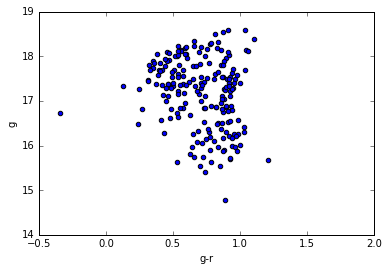

In [27]:
color1 = galaxies['r']-galaxies['i']
color2 = galaxies['g']-galaxies['r']
magnitude = galaxies['g']

plt.scatter(color2, magnitude)
plt.xlabel('g-r')
plt.ylabel('g')
plt.axis([-0.5, 2., 14, 19.])
plt.show() 